In [1]:
clear all

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

In [2]:
from sklearn import linear_model

# Open data

In [3]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie2/100133/100133Final/100133ss2on250cregcdFF30sMpsfkfint599Smith0_4_60TS.mat


In [4]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(20651, 599)

In [5]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie2/100133/100133Final/100133ss2on250cregcdFF30sMpsfkfint599Smith0_4_60IC.nii


In [6]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(180, 97, 10, 599)

In [8]:
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

In [9]:
Ua=sio.loadmat(filename)
Time_fluo=Ua['TimeFluoOn']
Time_fluo.shape

(1, 3582)

In [9]:
Time_fluoICA=Time_fluo[:,501:6346]

In [10]:
Time_fluoICA.shape

(1, 5845)

In [7]:
Time_fluoICA=np.array(range(20651))*0.01

Z-score

In [8]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [9]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [10]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

In [29]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie2/100133/100133Final/100133Xk.mat


In [30]:
Ua=sio.loadmat(filename)
Xk=Ua['Xk'].T

In [31]:
Xk.shape

(8, 20651)

# Open Masks

In [19]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)
img1 = nb.load(filenameM)
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

/home/sophie/Downloads/JFRC100133finalTransformedfullpsftrimmed.nii


In [20]:
filenameM='/home/sophie/Downloads/RegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.split('\t') for Line in content]
RegionName=[Names[i][0] for i in range(75)]
Num=[int(Names[i][2]) for i in range(75)]

# Average in masks to sort components by brain region

In [21]:
Dmaps.shape

(180, 97, 10, 599)

In [22]:
M=np.zeros((S[3],86))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(86)

In [23]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(86):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])

In [24]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],86))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(86):
        J=[l for l in range(74) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(75) if Num[l]==I]
    CompMainName[i]=Names[np.array(J)][0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [25]:
Time_fluoICA.shape

(20651,)

In [26]:
Xk.shape

(5, 20651)

In [34]:
Xk=Xk.T

AME_R
LO_R
2
AME_R
ME_R
66
AME_R
190
AME_R
LO_R
LOP_R
ME_R
223
AME_R
LO_R
NO
ME_R
359
AME_R
LO_R
ME_R
440
AME_R
BU_R
445
AME_R
BU_R
473
accessory medulla


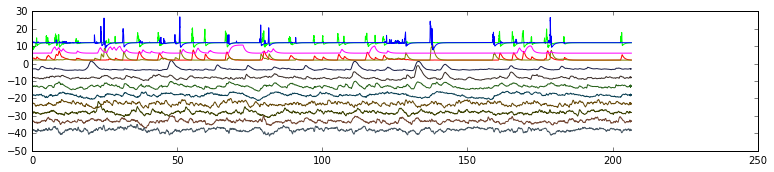

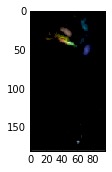

LO_R
BU_L
0
LO_R
ME_R
PLP_R
20
LO_R
LOP_R
21
LO_R
PVLP_R
23
LO_R
ME_R
25
LO_R
LOP_R
ME_R
26
LO_R
ME_R
30
AME_R
LO_R
ME_R
33
LO_R
36
LO_R
37
LO_R
PLP_R
40
LO_R
ME_R
45
LO_R
AOTU_R
53
LO_R
BU_R
LOP_R
57
LO_R
LOP_R
ME_R
78
LO_R
ME_R
82
LO_R
103
LO_R
LOP_R
ME_R
127
AME_R
LO_R
ME_R
135
LO_R
LOP_R
ME_R
162
LO_R
ME_R
164
LO_R
204
LO_R
NO
MB_VL_L
289
lobula


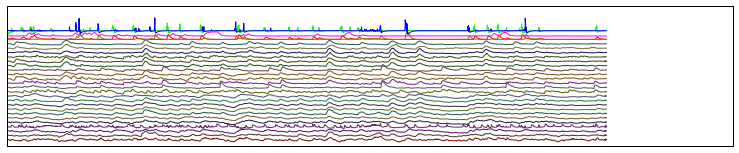

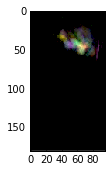

NO
BU_R
589
nodulus


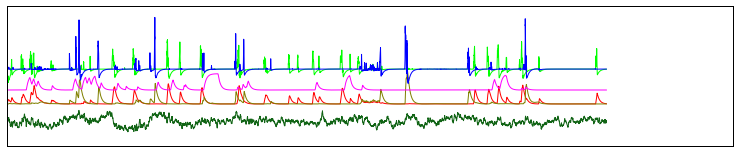

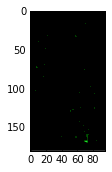

LO_R
BU_R
ME_R
AOTU_R
79
LO_R
BU_R
LOP_R
ME_R
107
BU_R
LOP_L
ME_L
113
LO_R
BU_R
CAN_L
183
BU_R
192
BU_R
218
NO
BU_R
ME_R
326
BU_R
GA_R
MB_VL_L
ME_L
407
BU_R
462
BU_R
477
BU_R
MB_VL_L
517
BU_R
CAN_L
GOR_L
527
BU_R
LOP_R
ME_R
GA_R
579
BU_R
585
bulb


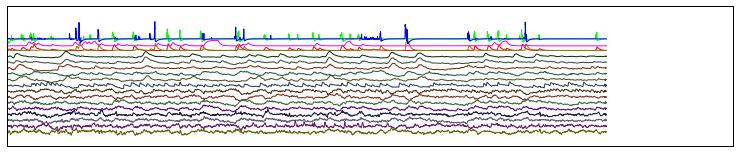

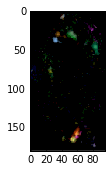

PB
ATL_R
5
PB
ATL_L
27
PB
EB
IB_L
50
protocerebral bridge


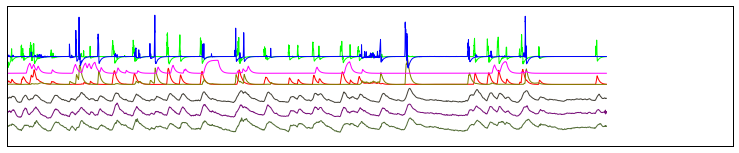

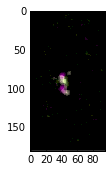

LH_R
AL_R
SLP_R
35
LH_R
SCL_R
74
LH_R
158
LH_R
PLP_R
MB_CA_R
178
LH_R
236
LH_R
SLP_R
284
LH_R
287
lateral horn


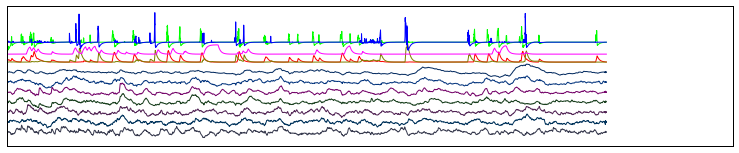

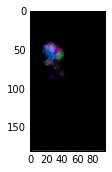

SAD
IPS_R
GNG
IPS_L
166
SAD
IPS_R
GNG
357
saddle


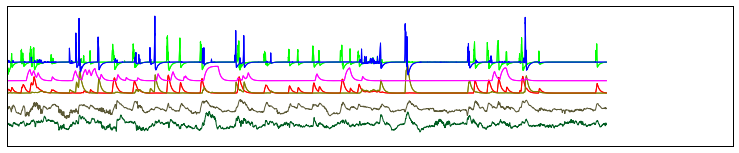

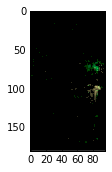

CAN_R
133
CAN_R
170
LO_R
CAN_R
BU_L
MB_VL_L
173
CAN_R
229
CAN_R
ME_R
IPS_L
259
CAN_R
LO_L
ME_L
360
CAN_R
LOP_L
ME_L
380
CAN_R
LOP_R
381
CAN_R
GNG
BU_L
IPS_L
400
CAN_R
ME_R
418
CAN_R
BU_L
487
CAN_R
BU_L
LOP_L
ME_L
556
cantle


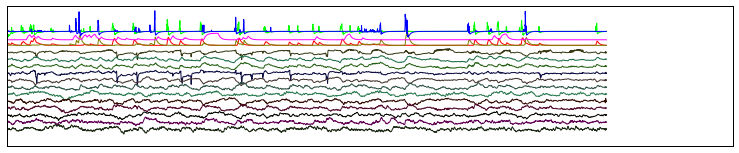

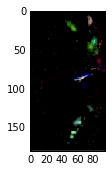

PB
IB_R
IB_L
3
IB_R
80
inferior bridge


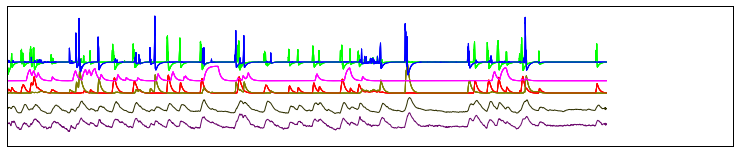

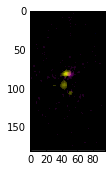

MB_PED_R
MB_VL_R
SIP_R
SCL_R
171
pedunculus of adult mushroom body


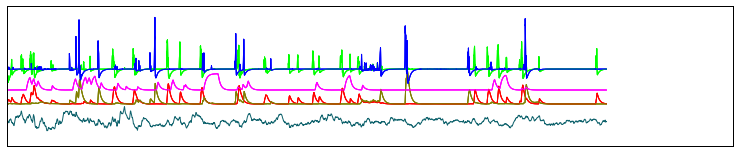

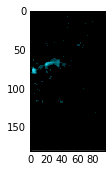

MB_PED_R
MB_VL_R
MB_ML_R
SIP_R
87
vertical lobe of adult mushroom body


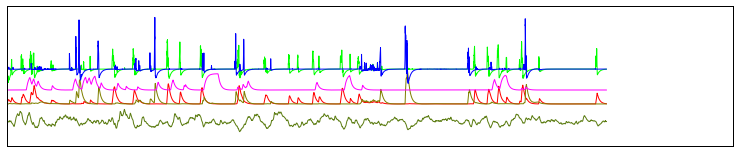

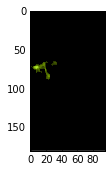

CRE_R
MB_PED_R
MB_ML_R
MB_CA_R
51
MB_PED_R
MB_ML_R
SCL_R
198
medial lobe of adult mushroom body


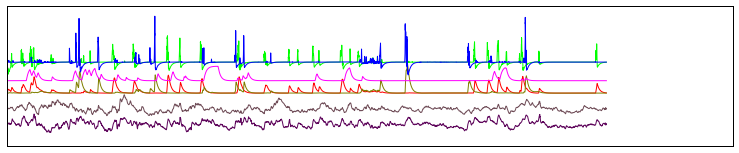

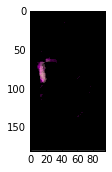

LOP_R
ME_R
BU_L
83
LOP_R
ME_R
97
LO_R
LOP_R
ME_R
106
LOP_R
109
AME_R
LO_R
NO
LOP_R
116
LOP_R
211
LOP_R
ME_R
343
LOP_R
345
LOP_R
ME_R
BU_L
362
LOP_R
404
LOP_R
427
IB_R
LOP_R
ME_R
465
LOP_R
ME_R
470
LOP_R
ME_R
497
LOP_R
ME_R
535
LOP_R
ME_R
541
lobula plate


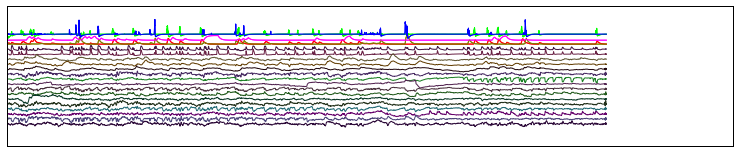

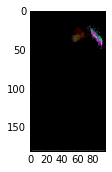

EB
137
MB_ML_R
EB
MB_ML_L
AL_L
447
ellipsoid body


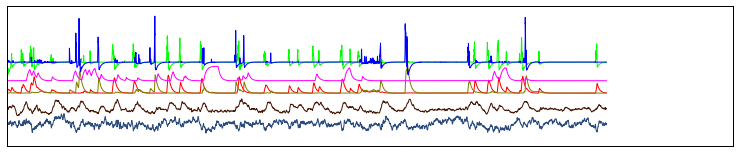

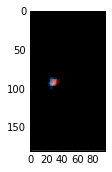

AL_R
42
AL_R
AL_L
43
AL_R
186
adult antennal lobe


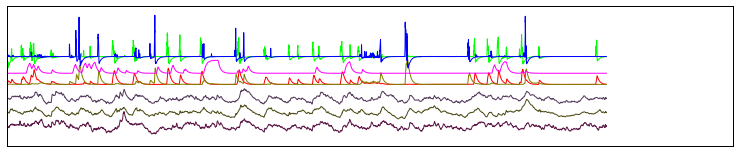

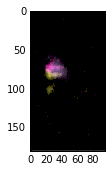

LO_R
ME_R
18
BU_R
LOP_R
ME_R
28
PB
FLA_R
ME_R
BU_L
102
LO_R
CAN_R
ME_R
145
LO_R
ME_R
AOTU_L
IPS_L
147
ME_R
182
NO
ME_R
184
ME_R
AVLP_R
250
LO_R
ME_R
AOTU_L
279
LO_R
BU_R
LOP_R
ME_R
291
ME_R
BU_L
298
ME_R
LH_L
SLP_L
AOTU_L
302
ME_R
332
LO_R
ME_R
BU_L
333
AME_R
CAN_R
ME_R
BU_L
337
ME_R
GOR_L
370
LO_R
ME_R
371
LO_R
BU_R
LOP_R
ME_R
377
ME_R
GA_R
MB_VL_L
454
LO_R
BU_R
ME_R
SIP_L
485
medulla


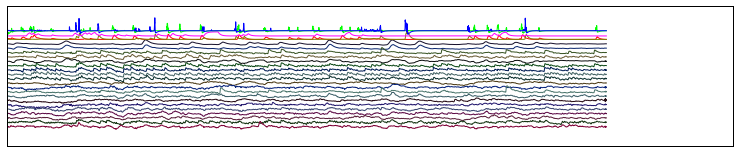

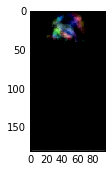

FB
BU_L
LAL_L
339
fan-shaped body


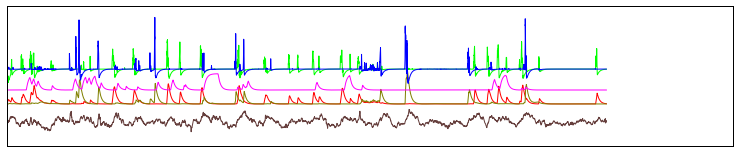

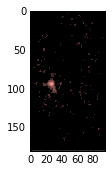

CRE_R
MB_VL_R
SLP_R
SIP_R
153
superior intermediate protocerebrum


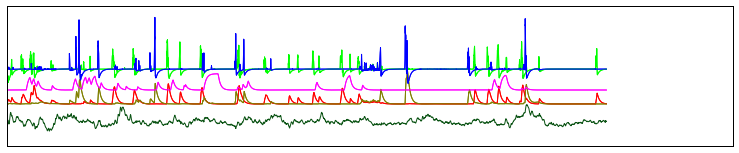

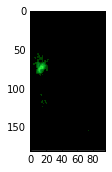

SMP_R
208
CRE_R
MB_VL_R
SIP_R
SMP_R
228
CAN_R
SMP_R
SMP_L
246
superior medial protocerebrum


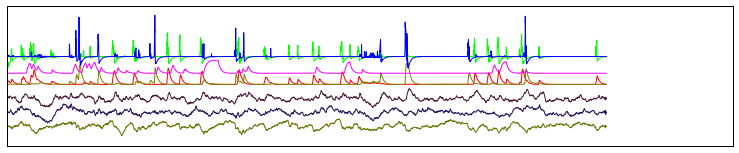

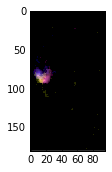

AVLP_R
49
anterior ventrolateral protocerebrum


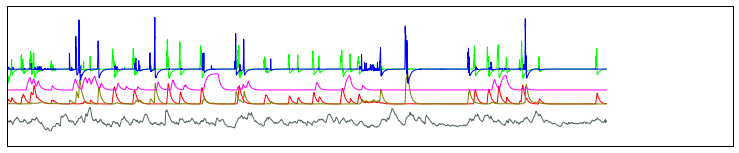

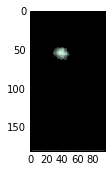

AVLP_R
PVLP_R
PLP_R
1
PVLP_R
PLP_R
72
LO_R
ME_R
AVLP_R
PVLP_R
85
posterior ventrolateral protocerebrum


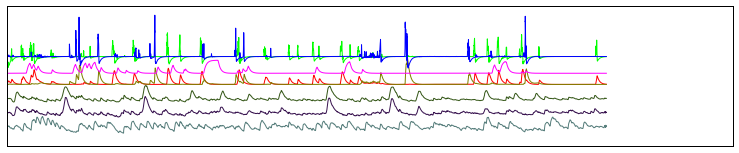

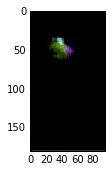

AMMC_R
PVLP_R
IVLP_R
32
wedge


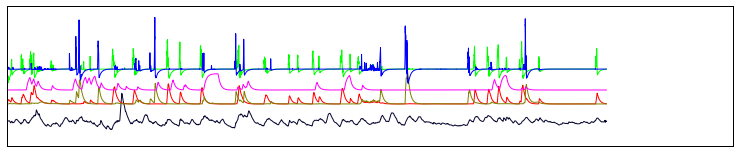

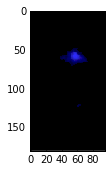

LO_R
PLP_R
52
PLP_R
150
posterior lateral protocerebrum


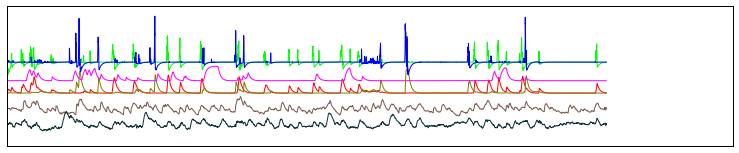

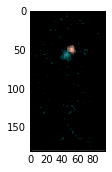

MB_CA_R
207
MB_CA_R
304
ICL_R
ATL_R
MB_CA_R
324
MB_VL_R
MB_CA_R
350
ATL_R
MB_PED_R
MB_VL_R
MB_CA_R
422
calyx of adult mushroom body


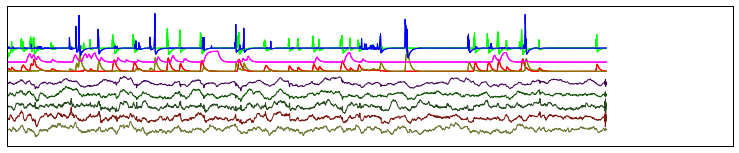

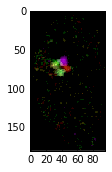

IB_R
SPS_R
4
CAN_R
SPS_R
IPS_R
BU_L
191
SPS_R
260
superior posterior slope


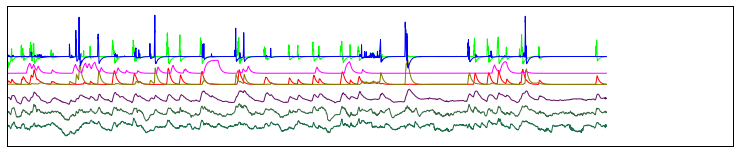

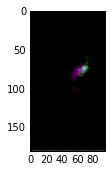

SPS_R
IPS_R
81
IPS_R
249
AMMC_R
SPS_R
IPS_R
308
SAD
IPS_R
330
SAD
IPS_R
GNG
IPS_L
472
inferior posterior slope


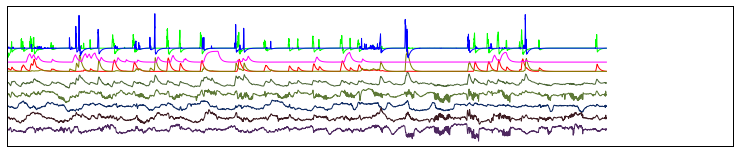

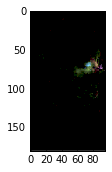

SAD
GNG
9
GNG
118
BU_R
IPS_R
GNG
219
AME_R
GNG
IPS_L
241
GNG
323
SAD
GNG
CAN_L
402
GNG
BU_L
492
BU_R
GNG
514
adult gnathal ganglion


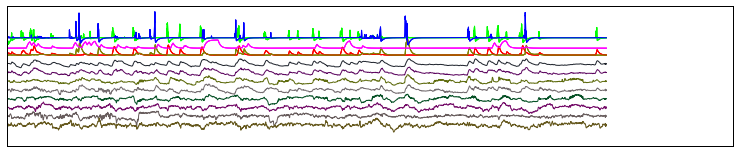

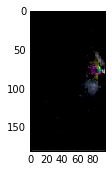

FLA_R
PRW
FLA_L
11
GNG
PRW
15
prow


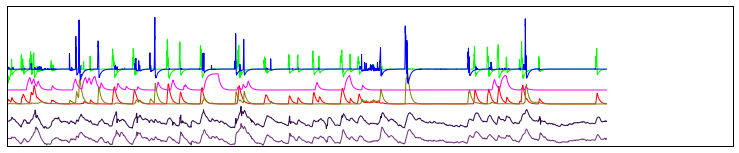

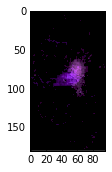

BU_R
GA_R
195
gall


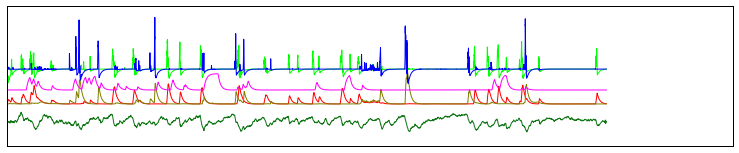

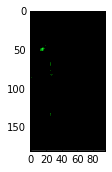

AME_L
AVLP_L
PVLP_L
38
accessory medulla


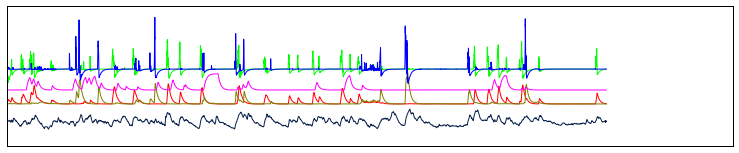

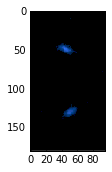

LO_L
LOP_L
39
LO_L
47
LO_L
PVLP_L
PLP_L
61
LO_L
67
LO_L
ME_L
69
LO_L
117
LO_L
LOP_L
PVLP_L
126
LO_L
BU_L
ME_L
239
LO_L
ME_L
282
LO_L
ME_L
331
lobula


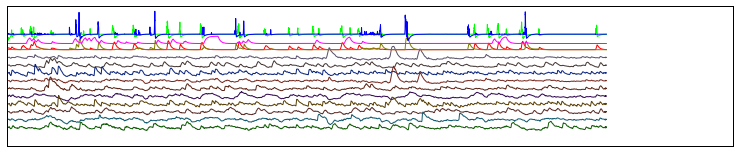

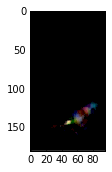

LO_R
ME_R
BU_L
110
BU_L
ME_L
SLP_L
AOTU_L
132
LO_R
ME_R
BU_L
143
BU_L
LOP_L
ME_L
213
CRE_R
BU_L
225
BU_L
230
ME_R
BU_L
233
BU_L
LH_L
CAN_L
235
AME_R
ME_R
BU_L
315
BU_L
391
LO_R
BU_L
429
BU_L
CAN_L
481
BU_R
GNG
BU_L
MB_PED_L
482
BU_L
489
AMMC_R
ME_R
BU_L
533
CAN_R
GNG
BU_L
546
bulb


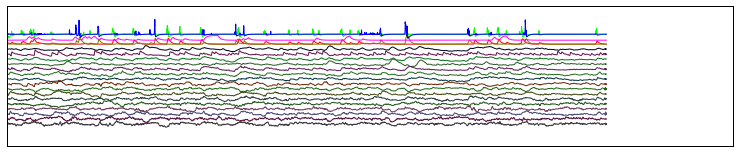

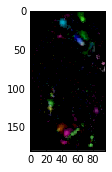

LH_L
10
LH_L
96
LH_L
AVLP_L
PVLP_L
165
lateral horn


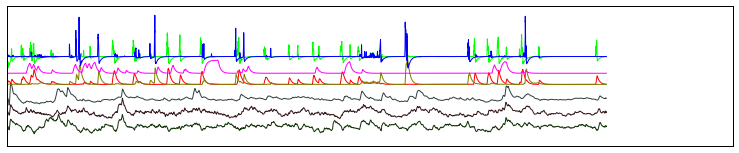

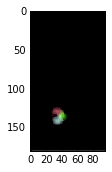

CAN_L
FLA_L
209
cantle


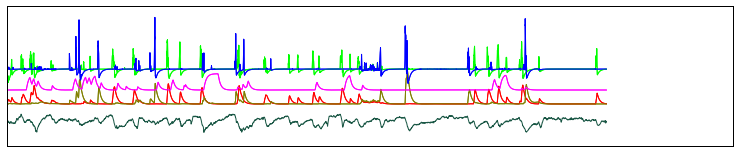

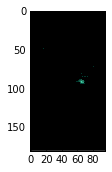

PB
BU_L
IB_L
MB_VL_L
14
inferior bridge


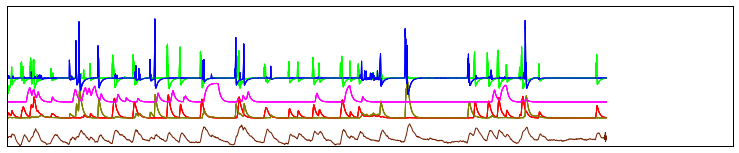

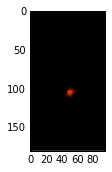

AME_R
LO_R
AOTU_R
ATL_L
144
ATL_L
MB_CA_L
188
ATL_L
ME_L
341
antler


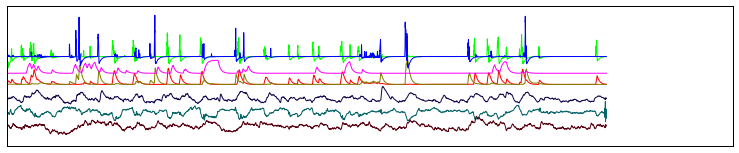

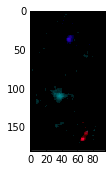

MB_PED_L
MB_CA_L
179
pedunculus of adult mushroom body


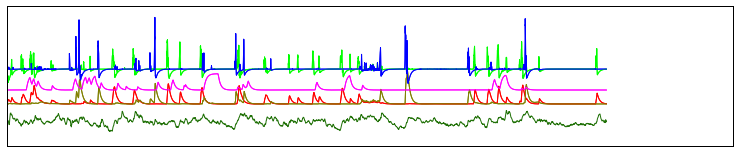

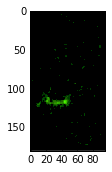

CRE_L
MB_VL_L
MB_ML_L
AL_L
48
CRE_L
MB_PED_L
MB_ML_L
MB_CA_L
55
MB_ML_R
EB
MB_ML_L
AL_L
355
medial lobe of adult mushroom body


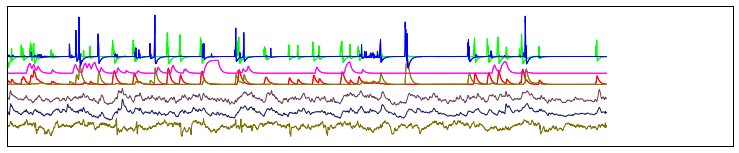

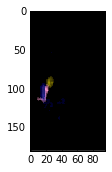

LO_L
BU_L
LOP_L
ME_L
63
LO_L
LOP_L
398
CAN_L
LOP_L
507
LO_L
LOP_L
550
lobula plate


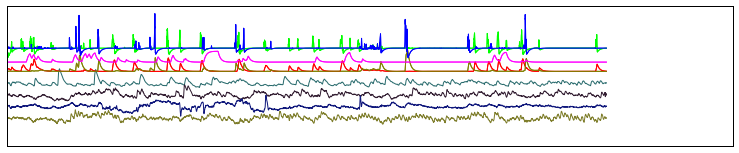

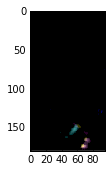

LAL_L
AL_L
EPA_L
6
AMMC_L
VES_L
AL_L
22
LAL_L
CRE_L
AL_L
41
adult antennal lobe


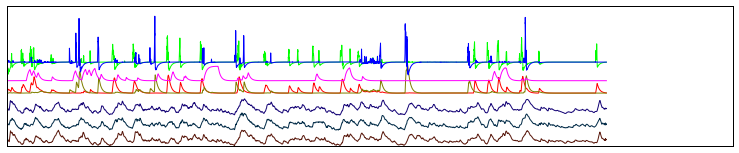

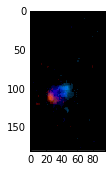

LO_L
LOP_L
ME_L
54
LO_L
ME_L
59
LO_L
ME_L
60
LO_L
BU_L
ME_L
77
BU_R
LO_L
LOP_L
ME_L
142
ME_L
156
LO_L
ME_L
GOR_L
160
NO
BU_L
LH_L
ME_L
167
ME_L
176
CAN_L
FLA_L
LOP_L
ME_L
180
BU_R
AME_L
LOP_L
ME_L
196
CAN_L
LOP_L
ME_L
202
BU_R
IB_R
ME_L
214
LOP_L
ME_L
263
ME_L
335
LO_L
MB_VL_L
ME_L
356
LO_L
LOP_L
ME_L
376
SLP_R
ME_L
385
MB_VL_R
LOP_L
ME_L
390
ME_L
393
CAN_L
MB_VL_L
LOP_L
ME_L
425
PB
LOP_L
ME_L
430
BU_R
LOP_L
ME_L
433
ME_L
444
CAN_R
AOTU_R
MB_VL_L
ME_L
450
LOP_L
ME_L
464
LO_L
LOP_L
ME_L
488
ME_L
515
LO_L
LOP_L
ME_L
523
CAN_R
BU_L
LOP_L
ME_L
548
GA_R
CAN_L
LOP_L
ME_L
551
medulla


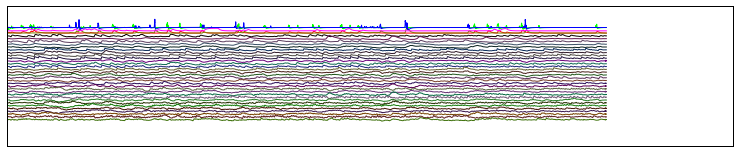

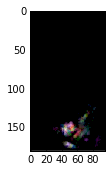

LH_L
SLP_L
436
superior lateral protocerebrum


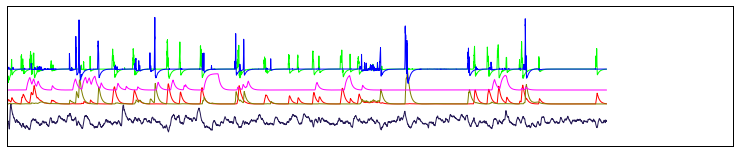

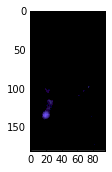

CRE_L
SMP_L
119
BU_R
SMP_L
MB_CA_L
274
superior medial protocerebrum


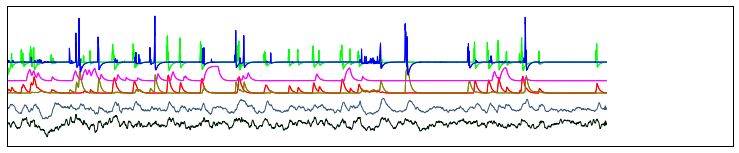

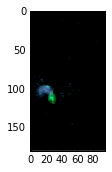

AVLP_L
92
AVLP_L
136
anterior ventrolateral protocerebrum


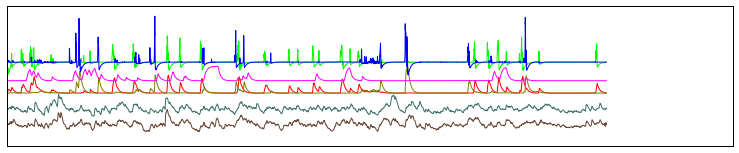

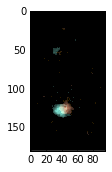

LO_L
PVLP_L
PLP_L
16
LO_L
BU_L
PVLP_L
PLP_L
157
AVLP_L
PVLP_L
PLP_L
389
posterior ventrolateral protocerebrum


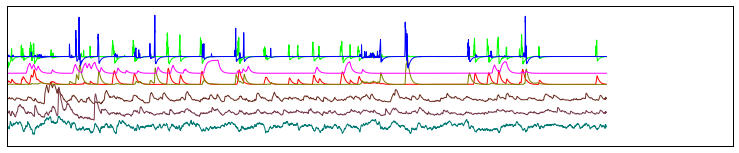

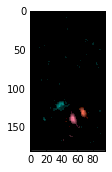

IVLP_L
PLP_L
17
wedge


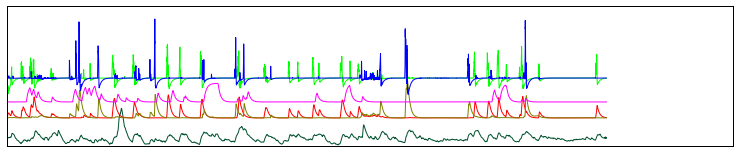

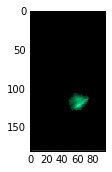

LH_L
PLP_L
MB_CA_L
99
posterior lateral protocerebrum


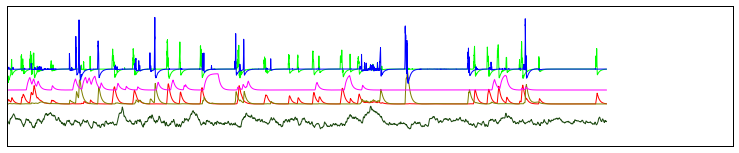

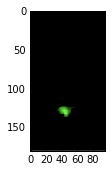

MB_CA_L
199
MB_PED_L
AOTU_L
MB_CA_L
275
calyx of adult mushroom body


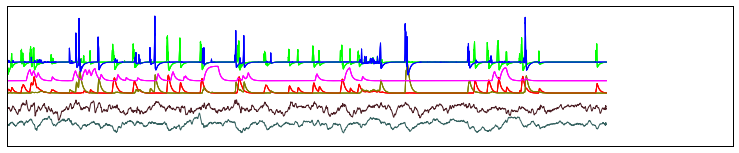

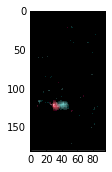

SPS_L
IPS_L
7
IPS_L
44
SAD
IPS_R
GNG
IPS_L
336
inferior posterior slope


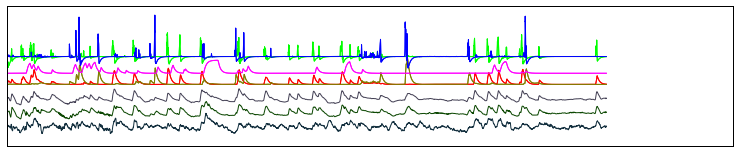

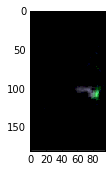

LO_R
LOP_R
ME_R
EPA_L
159
LO_R
EPA_L
177
BU_R
ME_L
EPA_L
253
EPA_L
309
AOTU_R
LO_L
EPA_L
372
ME_R
EPA_L
408
NO
LOP_R
ME_R
EPA_L
420
EPA_L
543
epaulette


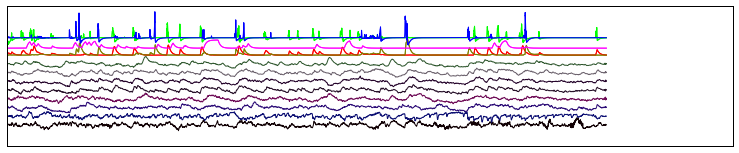

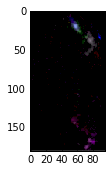

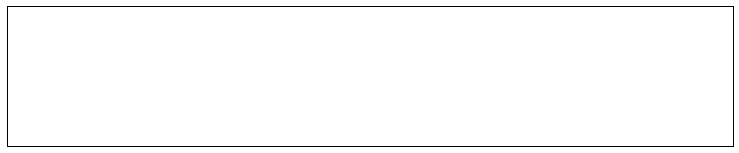

In [35]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)        
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
    plt.plot(Time_fluoICA,Xk[:,0]/np.std(Xk[:,0])+2,color=(1,0,0))   
    plt.plot(Time_fluoICA,Xk[:,1]/np.std(Xk[:,1])+2,color=(0.5,0.5,0))
    plt.plot(Time_fluoICA,Xk[:,4]/np.std(Xk[:,4])+6,color=(1,0,1))
    plt.plot(Time_fluoICA,Xk[:,6]/np.std(Xk[:,6])+12,color=(0,1,0))
    plt.plot(Time_fluoICA,Xk[:,7]/np.std(Xk[:,7])+12,color=(0,0,1))
    #plt.plot(Time_fluoICA.T,2*Xk[:,2]/np.max(Xk[:,2])+1.5,color=(1,0,1))    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
# Open template

In [36]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenamet = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenamet)
nimt=nb.load(filenamet)
Dtemp=np.squeeze(nimt.get_data())
Dtemp.shape

/media/sophie2/100133/100133Final/AVG_100133ss2on250cregcpsf.nii


(180, 97, 10)

# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [51]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

In [52]:
SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

In [53]:
Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

In [54]:
LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

In [55]:
LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

In [56]:
LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

In [57]:
SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

In [58]:
NewOrder=np.argsort(SmallRegion)

# Last pruning by hand

In [37]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =4000;

<IPython.core.display.Javascript object>

In [38]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    D1=np.zeros([S[0],S[1],Nstack])
    Dmean=np.squeeze(data[:,:,range(Nstack),2])
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        Dmean[:,:,i]=Vmean
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]])
    Dmean=data[:,:,range(S[2])]  
    Dmean=np.squeeze(Dtemp[:,:,:])

/usr/local/lib/python2.7/dist-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


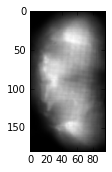

In [39]:
plt.imshow(Dmean[:,:,1],cmap=plt.cm.gray)

In [40]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
Good_ICs=np.zeros(S[3])
Label_ICs=[]
pylab.rcParams['figure.figsize'] = (15, 2.5)

In [41]:
algorithm = linear_model.LinearRegression()

In [44]:
Sxk=Xk.shape

In [45]:
X=np.zeros((Sxk[0],6))

In [46]:
X[:,0]=(Xk[:,0]-np.mean(Xk[:,0]))/np.std(Xk[:,0])
X[:,1]=(Xk[:,1]-np.mean(Xk[:,1]))/np.std(Xk[:,1])
X[:,2]=(Xk[:,3]-np.mean(Xk[:,3]))/np.std(Xk[:,3])
X[:,3]=(Xk[:,4]-np.mean(Xk[:,4]))/np.std(Xk[:,4])
X[:,4]=(Xk[:,6]-np.mean(Xk[:,6]))/np.std(Xk[:,6])
X[:,5]=(Xk[:,7]-np.mean(Xk[:,7]))/np.std(Xk[:,7])

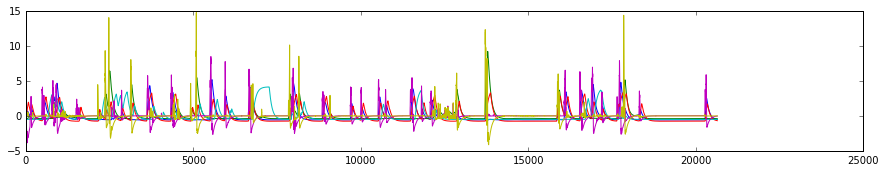

In [48]:
plt.plot(X[:,0])
plt.plot(X[:,1])
plt.plot(X[:,2])
plt.plot(X[:,3])
plt.plot(X[:,4])
plt.plot(X[:,5])

In [59]:
for j in range(S[3]):

    a=''
    if S[2]>5:
        for i in range(Nstack):
            V=Dmaps[:,:,Indices[i],j]
            D1[:,:,i]=np.max(V,2)
        D2[:,:,:,j]=D1
        D1[D1==0]=np.nan
           
    else:
        for i in range(S[2]):
            V=Dmaps[:,:,i,Order[j]]
            D1[:,:,i]=V 

    if (CompMainName[j] != '') and (LargerRegionI[j]!=1) and (LargerRegionI[j]==1 or LargerRegionI[j]==1
                                                             
                                                             
                                                             ):
        print(j)
        print(CompMainName[j])
        for i in range(Nstack):
            plt.subplot(1,5,i+1)
            plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
            plt.imshow(D1[:,:,i], cmap=my_cmap,interpolation='none')
            frame1 = plt.gca()
            frame1.axes.get_xaxis().set_visible(False)
            frame1.axes.get_yaxis().set_visible(False)
        
        plt.show()
        
        model = algorithm.fit(X, DT[:,j])
        betas = model.coef_
        rsq = model.score(X,DT[:,j])
        print('left:',betas[0],'right:',betas[1],'walk:',betas[2],'groom:',betas[3])
        print(rsq)
        plt.plot(Time_fluoICA.T,2*DT[:,j]+1.5)
        plt.plot(Time_fluoICA.T,2*(Xk[:,0]-Xk[:,1])/np.max(Xk[:,0]-Xk[:,1]),color=(1,0,0))   
        plt.plot(Time_fluoICA.T,Xk[:,4]/np.max(Xk[:,4])+4,color=(1,0,0))
        plt.show()
        a=raw_input()
    
    Label_ICs.append(a)
    if Label_ICs[j]!='':
        Good_ICs[j]=1

In [60]:
Dmaps.shape

(180, 97, 10, 599)

In [61]:
fn=open('/home/sophie/Desktop/100133GoodICs150.txt','w')
for i in range(S[3]):
    if Good_ICs[i]:
        print>>fn, i
        print>>fn, CompMainName[i]
        print>>fn, Good_ICs[i]

In [62]:
if len(Label_ICs)<S[3]:
    for j in range(S[3]-len(Label_ICs)):
      Label_ICs.append('')  

In [63]:
G=Good_ICs.tolist();

In [64]:
len(Good_ICs)

599

In [65]:
G.count(1)

0

# Plot all components for turning left, right, walking, and grooming

In [69]:
Rsq=np.zeros((1,S[3]))
Betas=np.zeros((6,S[3]))

In [71]:
for j in range(S[3]):
    model = algorithm.fit(X, DT[:,j])
    Betas[:,j] = model.coef_
    Rsq[:,j] = model.score(X,DT[:,j])

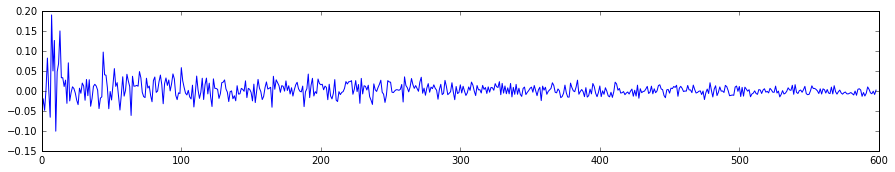

In [72]:
plt.plot(Betas[0,:])

In [73]:
RsqUni=np.zeros((6,S[3]))
BetaUni=np.zeros((6,S[3]))
Sx=X.shape

In [74]:
for k in range(6):
    for j in range(S[3]):
        model = algorithm.fit(np.reshape(X[:,k],(Sx[0],1)), DT[:,j])
        BetaUni[k,j] = model.coef_
        RsqUni[k,j] = model.score(np.reshape(X[:,k],(Sx[0],1)),DT[:,j])
   

In [ ]:
GoodICo=Good_ICs[NewOrder]
D2o=D2[:,:,:,NewOrder]
LargerRegionIo=LargerRegionI[NewOrder]
Ind=np.array(range(S[3]))
Indexo=Ind[NewOrder]
DTo=DT[:,NewOrder]

In [87]:
import random

In [122]:
del Final_map
del Fmaps

In [123]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape

In [125]:
C=np.zeros((S[3],3))
i=0
for j in range(S[3]):  
    if Betas[0,j]>0.6*np.max(Betas[0,:]):
    #if 1>0.1:
        #C[j,:]=C1[i%6][:]
        C[j,0]=1
        C[j,1]=random.uniform(0,1)
        #C[j,2]=1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.8*D2[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        J=j
        #print(Indexo[j])
        i=i+1

In [126]:
np.max(np.max(np.max(Final_map)))

0.84645980462847903

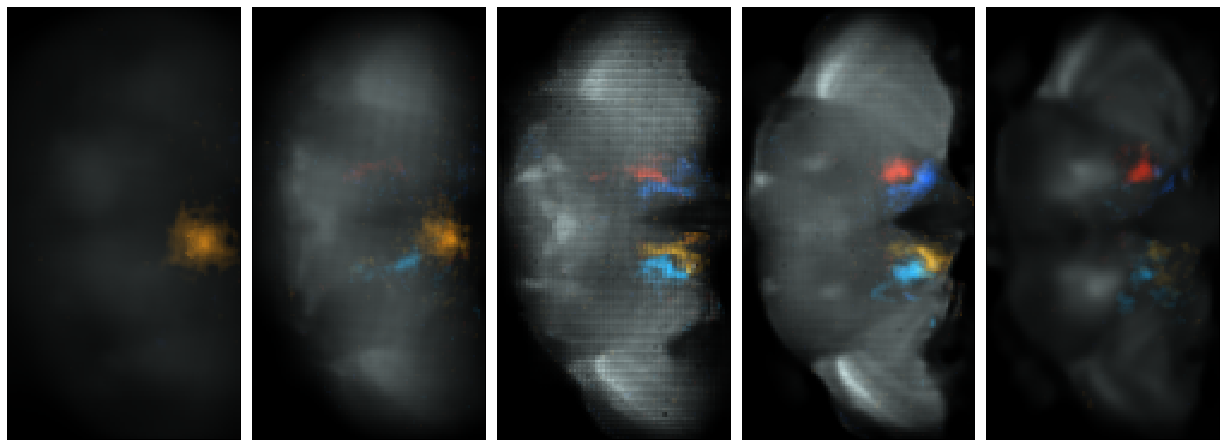

In [129]:
pylab.rcParams['figure.figsize'] = (17, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/16
    Df=Df/(np.max(np.max(Df)))
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Df[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)

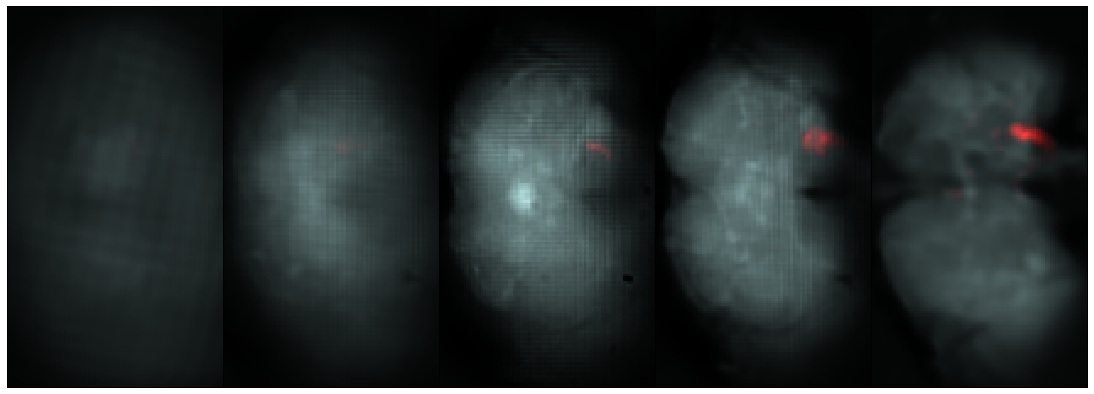

In [138]:
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/16
    Df=Df/(np.max(np.max(Df)))
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Df[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)

# Plot all components together

In [71]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])

In [72]:
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape

In [73]:
GoodICo=Good_ICs[NewOrder]
D2o=D2[:,:,:,NewOrder]
LargerRegionIo=LargerRegionI[NewOrder]
Ind=np.array(range(S[3]))
Indexo=Ind[NewOrder]
DTo=DT[:,NewOrder]

In [74]:
C=np.zeros((S[3],3))
i=0
for j in range(S[3]):  
    if LargerRegionIo[j]<12 and GoodICo[j]:
        C[j,:]=C1[i%6][:]
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2o[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.6*D2o[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #print(Indexo[j])
        i=i+1

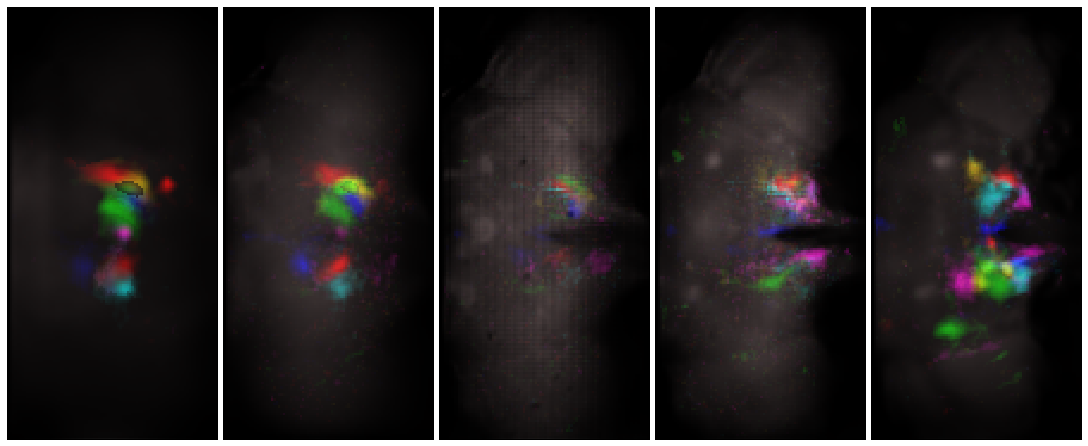

In [75]:
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/16
    Df=Df/(np.max(np.max(Df)))
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)

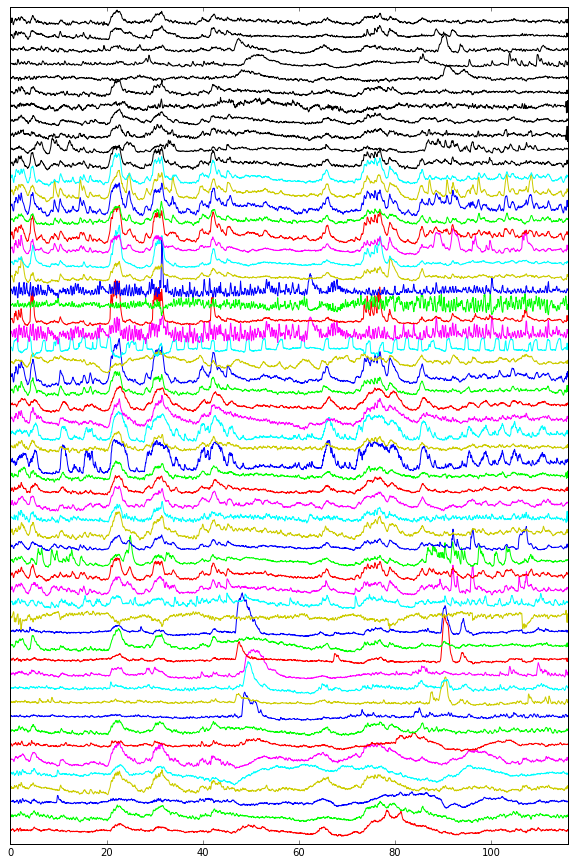

In [123]:
pylab.rcParams['figure.figsize'] = (10, 15)
h=0.5
i=0

for j in range(S[3]):
    if GoodICo[j]:
        plt.plot(Time_fluoICA,(DTo[:,j]+h*i),color=C[j,:]) 
        i=i+1
plt.xlim([np.min(Time_fluoICA),np.max(Time_fluoICA)])
plt.ylim([-0.5,h*i])
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
plt.show()

In [124]:
k=0
J=np.zeros(len(GoodICo[GoodICo==1]))
for j in range(len(GoodICo)):
    if GoodICo[j]:
        print(k)
        print([CompMainName[Indexo[j]]])
        J[k]=j
        k=k+1

0
['ME_L']
1
['ME_L']
2
['ME_L']
3
['ME_L']
4
['ME_L']
5
['ME_L']
6
['ME_R']
7
['ME_R']
8
['LO_R']
9
['LO_R']
10
['LO_R']
11
['LO_R']
12
['LO_L']
13
['LO_L']
14
['LO_L']
15
['LOP_L']
16
['AVLP_R']
17
['AVLP_L']
18
['IVLP_R']
19
['IVLP_R']
20
['IVLP_L']
21
['AL_L']
22
['MB_VL_R']
23
['SMP_R']
24
['EB']
25
['PB']
26
['PB']
27
['PB']
28
['PB']
29
['PB']
30
['PB']
31
['SPS_R']
32
['SPS_L']
33
['IPS_R']
34
['IPS_R']
35
['IPS_R']
36
['IPS_R']
37
['IPS_R']
38
['IPS_R']
39
['IPS_R']
40
['IPS_L']
41
['IPS_L']
42
['SAD']
43
['FLA_L']
44
['PRW']
45
['PRW']
46
['PRW']
47
['GNG']
48
['']
49
['']
50
['']
51
['']
52
['']
53
['']
54
['']
55
['']
56
['']
57
['']


In [125]:
Sets=[range(10),range(10,12),range(12,17),range(17,20),20,range(21,23),range(23,25),25]

In [126]:
pylab.rcParams['figure.figsize'] = (12, 6)

for i in range(len(Sets)):
    
    Final_map2=np.zeros([S[0],S[1],3]) 
    Fmaps2=np.zeros([S[0],S[1],3]) 
    Final_map3=np.zeros([S[0],S[1],5,3]) 
    Fmaps3=np.zeros([S[0],S[1],5,3])     
     
    if type(Sets[i])==list:
        for j in np.array(Sets[i]):
            C=np.zeros((S[3],3))
            C[j,:]=C1[j%6][:]
            
            for k in range(3):           
                M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1]*5)))
                Fmaps2[:,:,k]=0.9*np.mean(D2o[:,:,:,J[j]],2)*C[j,k]/M
                M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1],5)))
                Fmaps3[:,:,:,k]=0.9*D2o[:,:,:,J[j]]*C[j,k]/M                
            Final_map2=Final_map2+Fmaps2
            Final_map3=Final_map3+Fmaps3            
                
    else:
        j=Sets[i]
        C[j,:]=C1[j%6][:]
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1]*5)))
            Fmaps2[:,:,k]=0.8*np.mean(D2o[:,:,:,J[j]],2)*C[j,k]/M
        Final_map2=Final_map2+Fmaps2
                
    Df=np.zeros([S[0],S[1],3]) 
  
    for l in range(3):
        Df[:,:,l]=Final_map2[:,:,l]+np.mean(Dmean,2)/16
    MM=np.max(np.max(Df))

    Rotated=ndimage.rotate(Df[:,:,:]/MM,-90)
    a=plt.imshow(Rotated,cmap=my_cmap,interpolation='none')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

    plt.show()
                                

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


ValueError: total size of new array must be unchanged